# Comparing effect sizes

## Import packages

In [1]:
import sys
sys.path.insert(0,"/home/yunye/gwaslab/gwaslab/src")
import gwaslab as gl
import pandas as pd

## Download sample sumstats

In [8]:
!wget -O bbj_bmi_male.txt.gz http://jenger.riken.jp/2analysisresult_qtl_download/

!wget -O bbj_bmi_female.txt.gz http://jenger.riken.jp/4analysisresult_qtl_download/

--2023-02-05 20:54:37--  http://jenger.riken.jp/2analysisresult_qtl_download/
Resolving jenger.riken.jp (jenger.riken.jp)... 134.160.84.25
Connecting to jenger.riken.jp (jenger.riken.jp)|134.160.84.25|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 136657659 (130M) [text/plain]
Saving to: ‘bbj_bmi_male.txt.gz’

bbj_bmi_male.txt.gz 100%[===================>] 130.33M  11.1MB/s    in 12s     

2023-02-05 20:54:49 (10.9 MB/s) - ‘bbj_bmi_male.txt.gz’ saved [136657659/136657659]

--2023-02-05 20:54:49--  http://jenger.riken.jp/4analysisresult_qtl_download/
Resolving jenger.riken.jp (jenger.riken.jp)... 134.160.84.25
Connecting to jenger.riken.jp (jenger.riken.jp)|134.160.84.25|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 136645377 (130M) [text/plain]
Saving to: ‘bbj_bmi_female.txt.gz’

bbj_bmi_female.txt. 100%[===================>] 130.31M  10.2MB/s    in 12s     

2023-02-05 20:55:01 (10.7 MB/s) - ‘bbj_bmi_female.txt.gz’ saved [136645377/

## Creating comparison plot using beta and se

Sun Feb  5 20:55:01 2023 Start to process the raw sumstats for plotting...
Sun Feb  5 20:55:01 2023  -Loading Male SNP list in memory...
Sun Feb  5 20:55:07 2023  -Loading sumstats for Female: SNP,P,CHR,POS
Sun Feb  5 20:55:15 2023  -Counting  variants available for both datasets: 5961600  variants...
Sun Feb  5 20:55:20 2023  -Using only variants available for both datasets...
Sun Feb  5 20:55:20 2023  -Extract lead variants from Female...
Sun Feb  5 20:55:20 2023 Start to extract lead variants...
Sun Feb  5 20:55:20 2023  -Processing 5961600 variants...
Sun Feb  5 20:55:20 2023  -Significance threshold : 5e-06
Sun Feb  5 20:55:20 2023  -Sliding window size: 500  kb
Sun Feb  5 20:55:21 2023  -Found 3455 significant variants in total...
Sun Feb  5 20:55:21 2023  -Identified 66 lead variants!
Sun Feb  5 20:55:21 2023 Finished extracting lead variants successfully!
Sun Feb  5 20:55:21 2023  -Loading sumstats for Male: SNP,P,CHR,POS
Sun Feb  5 20:55:32 2023  -Extract lead snps from Male..

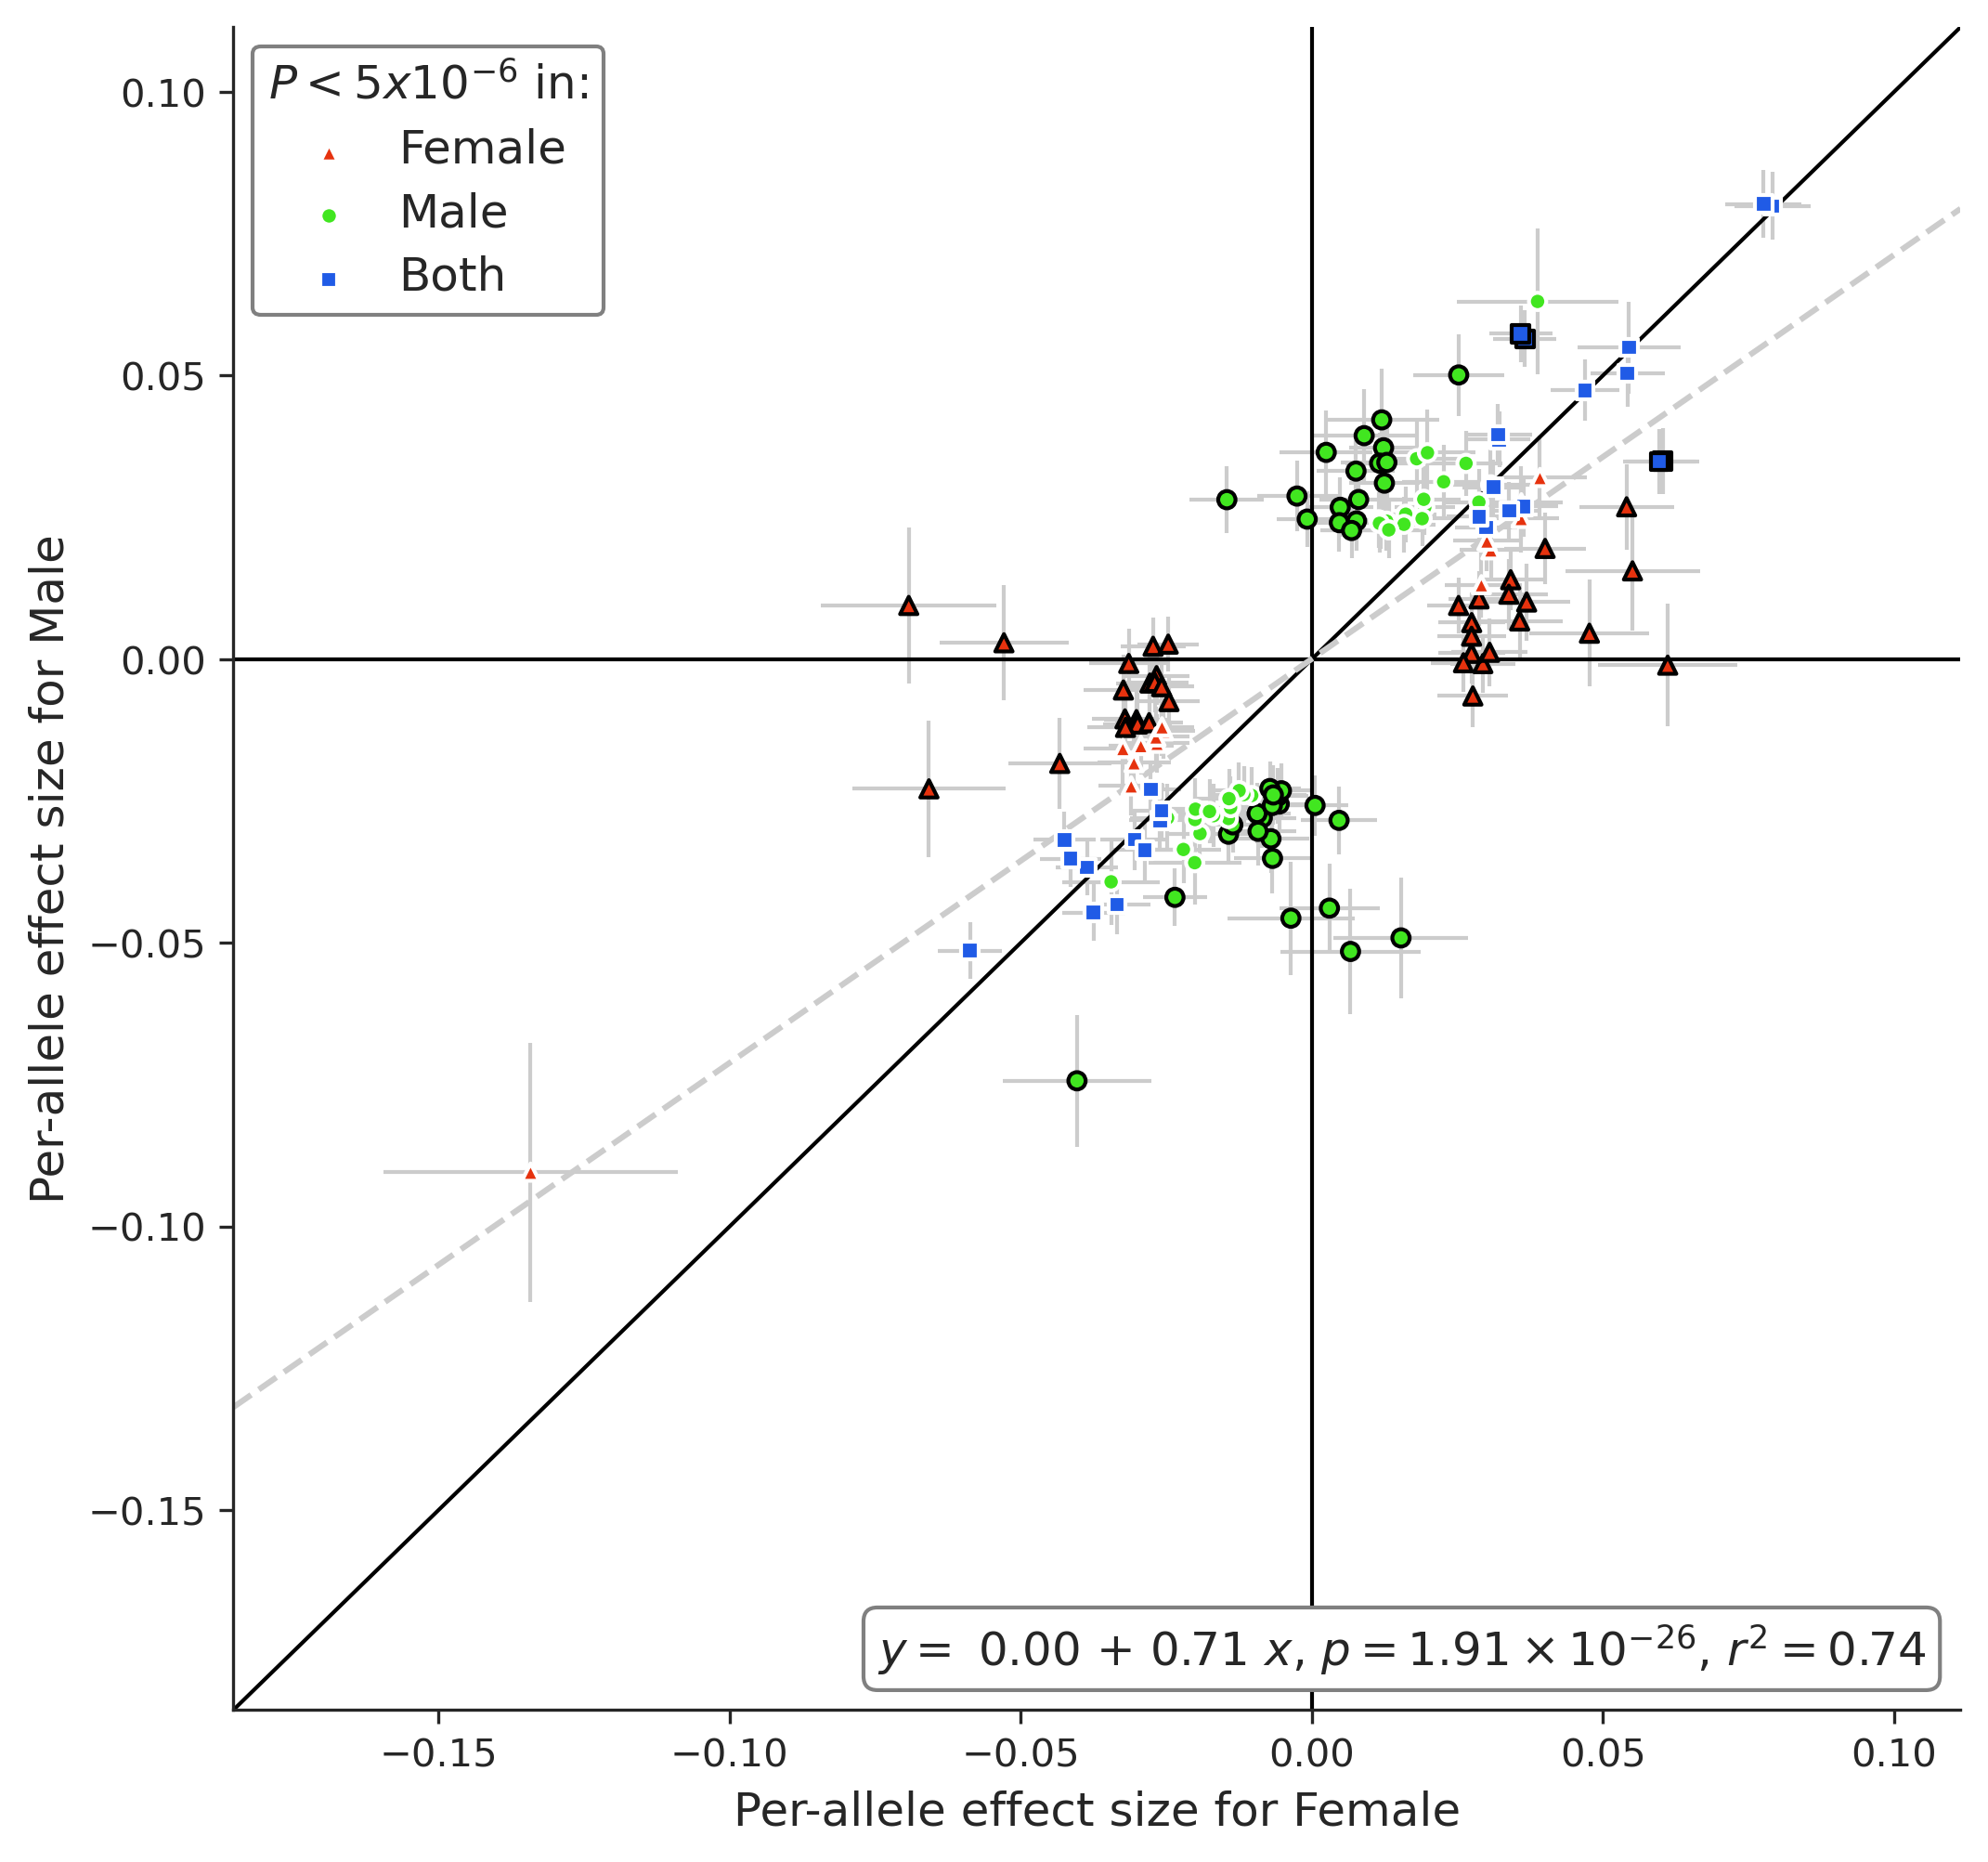

In [9]:
# SNP	CHR	POS	A1	A2	A1Frq	Rsq	BETA	SE	P
# gwaslab will automatically extract significant variants from both sumstats. 
a = gl.compare_effect("bbj_bmi_female.txt.gz",
                      ["SNP","P","REF","ALT","CHR","POS"],["BETA","SE"],
                      "bbj_bmi_male.txt.gz",
                      ["SNP","P","REF","ALT","CHR","POS"],["BETA","SE"],
                      label=["Female","Male","Both","None"],
                      xylabel_prefix="Per-allele effect size for ",
                      sig_level=5e-6,
                      legend_title=r'$ P < 5 x 10^{-6}$ in:',
                      verbose=True
)

## Specify the snps you want to check

In [11]:
#randomly extract 15 snps for comparison
# zcat bbj_bmi_female.txt.gz | shuf -n 25 | cut -f 1

In [12]:
# store them in a list
snps = [
"rs1863794",
"rs78031431",
"rs2065160",
"rs79873757",
"rs76557076",
"rs75763355",
"rs73465683",
"rs7259784",
"rs12752457",
"rs1984969",
"rs4598662",
"rs36013795",
"rs7411446",
"rs3785568",
"rs13850768",
"rs77247065",
"rs7718738",
"rs74800130",
"rs79767381",
"rs6544774",
"rs245902",
"rs7994403",
"rs79658166",
"rs6822158",
"rs73442063"
]

## Creating comparison plot using beta and se of specified variants

Sun Feb  5 20:59:02 2023 Start to process the raw sumstats for plotting...
Sun Feb  5 20:59:02 2023  -Loading Male SNP list in memory...
Sun Feb  5 20:59:08 2023  -Loading sumstats for Female: SNP,P
Sun Feb  5 20:59:15 2023  -Counting  variants available for both datasets: 5961600  variants...
Sun Feb  5 20:59:20 2023  -Using only variants available for both datasets...
Sun Feb  5 20:59:20 2023  -Extract variants in the given list from Female...
Sun Feb  5 20:59:20 2023  -Loading sumstats for Male: SNP,P
Sun Feb  5 20:59:31 2023  -Extract snps in the given list from Male...
Sun Feb  5 20:59:31 2023 Merging snps from Female and Male...
Sun Feb  5 20:59:31 2023  -Extract statistics of selected variants from Female :  SNP,P,REF,ALT,BETA,SE
Sun Feb  5 20:59:46 2023  -Merging Female effect information...
Sun Feb  5 20:59:51 2023  -Extract statistics of selected variants from Male :  SNP,P,REF,ALT,BETA,SE
Sun Feb  5 21:00:07 2023  -Merging Male effect information...
Sun Feb  5 21:00:12 2023 

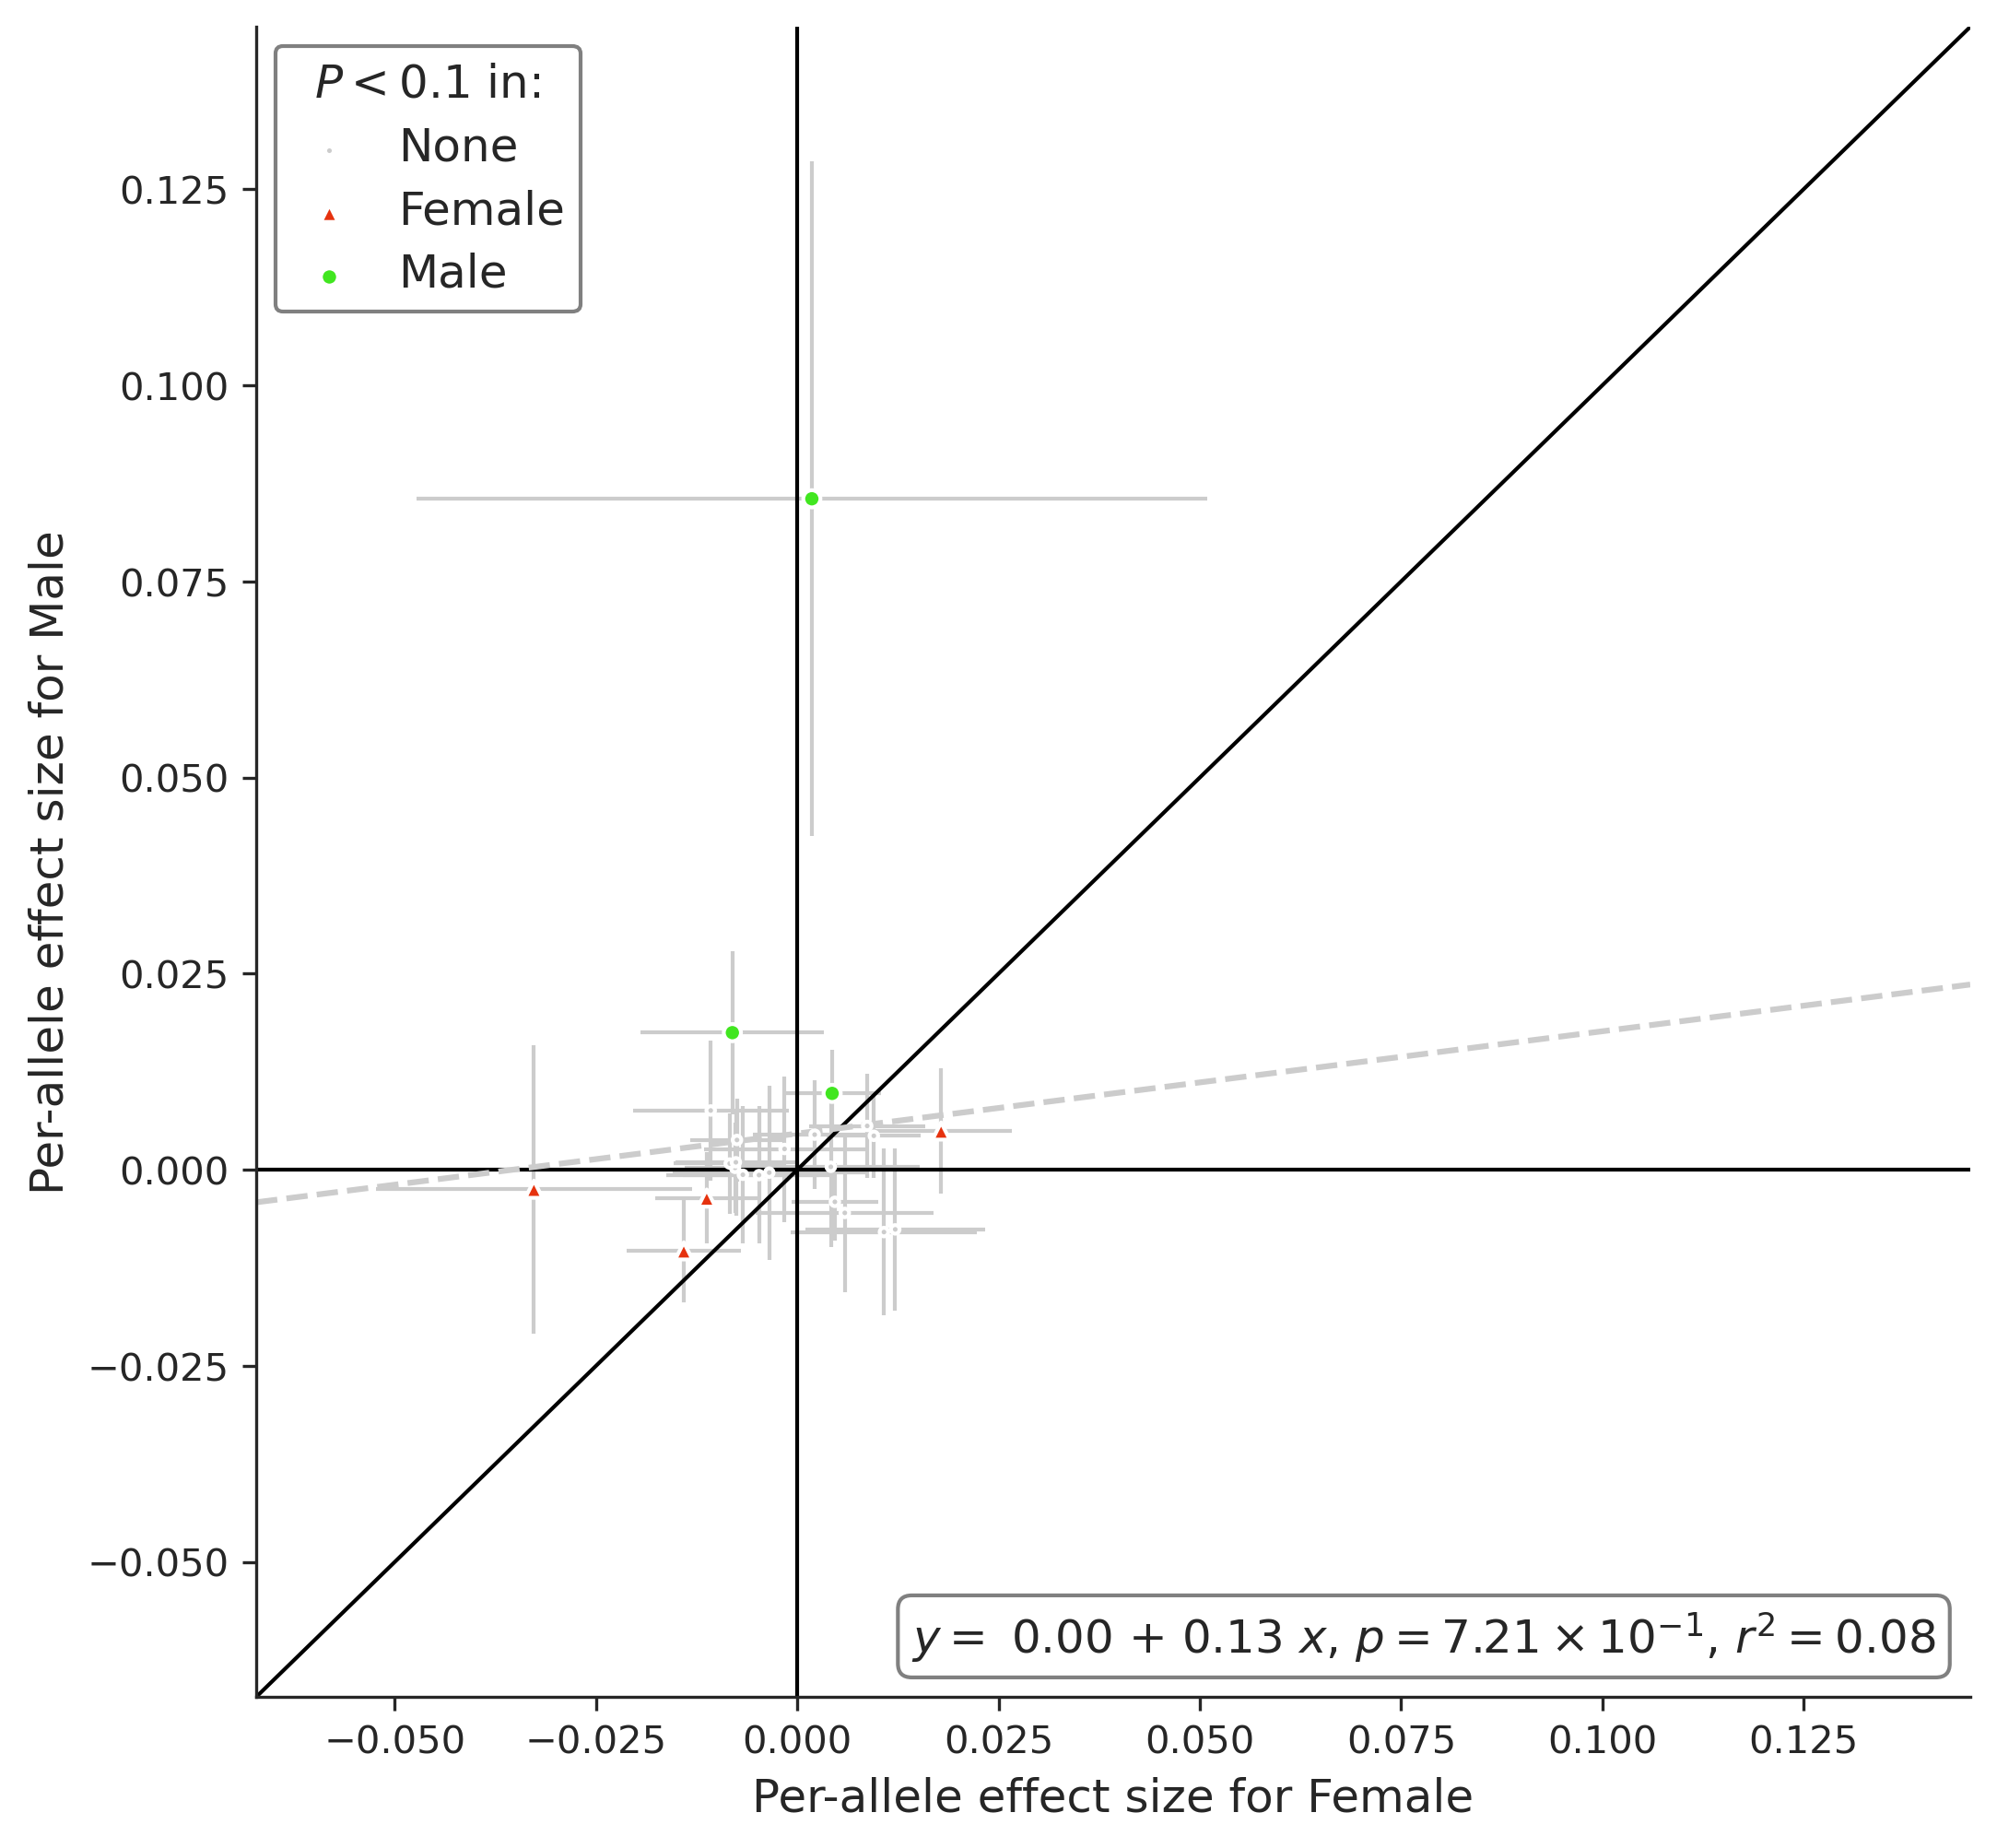

In [13]:
# SNP	CHR	POS	A1	A2	A1Frq	Rsq	BETA	SE	P
a = gl.compare_effect("bbj_bmi_female.txt.gz",
                      ["SNP","P","REF","ALT","CHR","POS"],["BETA","SE"],
                      "bbj_bmi_male.txt.gz",
                      ["SNP","P","REF","ALT","CHR","POS"],["BETA","SE"],
                      label=["Female","Male","Both","None"],
                      xylabel_prefix="Per-allele effect size for ",
                      sig_level=0.1,
                      legend_title=r'$ P < 0.1$ in:',
                      snplist=snps,
                      verbose=True
)

## Check raw data

In [14]:
#data
a[0]

,P_1,P_2,EA_1,NEA_1,EFFECT_1,SE_1,EA_2,NEA_2,EFFECT_2,SE_2,indicator,EA_2_aligned,NEA_2_aligned,EFFECT_2_aligned,Q,HetP,Edge_color,I2
SNPID,,,,,,,,,,,,,,,,,,
rs12752457,0.04261,0.53740,G,A,0.017860,0.008810,G,A,0.004928,0.007991,1,G,A,0.004928,1.182117,0.276926,white,0.154060
rs79873757,0.04708,0.11610,G,A,-0.014100,0.007103,G,A,-0.010350,0.006585,1,G,A,-0.010350,0.149896,0.698634,white,0.000000
rs7718738,0.07710,0.53430,G,A,-0.011250,0.006364,G,A,-0.003617,0.005821,1,G,A,-0.003617,0.783263,0.376145,white,0.000000
rs77247065,0.09607,0.89220,C,T,-0.032720,0.019660,C,T,-0.002492,0.018380,1,C,T,-0.002492,1.261468,0.261373,white,0.207273
rs245902,0.10370,0.41980,T,A,0.009501,0.005838,T,A,0.004318,0.005352,0,T,A,0.004318,0.428266,0.512841,white,0.000000
rs36013795,0.19560,0.47450,C,T,-0.007498,0.005794,C,T,0.003788,0.005296,0,C,T,0.003788,2.067151,0.150502,white,0.516242
rs2065160,0.21280,0.96720,A,G,-0.007738,0.006211,A,G,0.000236,0.005732,0,A,G,0.000236,0.890071,0.345458,white,0.000000
rs7259784,0.22590,0.39740,A,G,0.008678,0.007166,A,G,0.005579,0.006592,0,A,G,0.005579,0.101299,0.750276,white,0.000000
rs1984969,0.22880,0.90250,A,G,-0.008401,0.006981,A,G,0.000782,0.006386,0,A,G,0.000782,0.942086,0.331742,white,0.000000


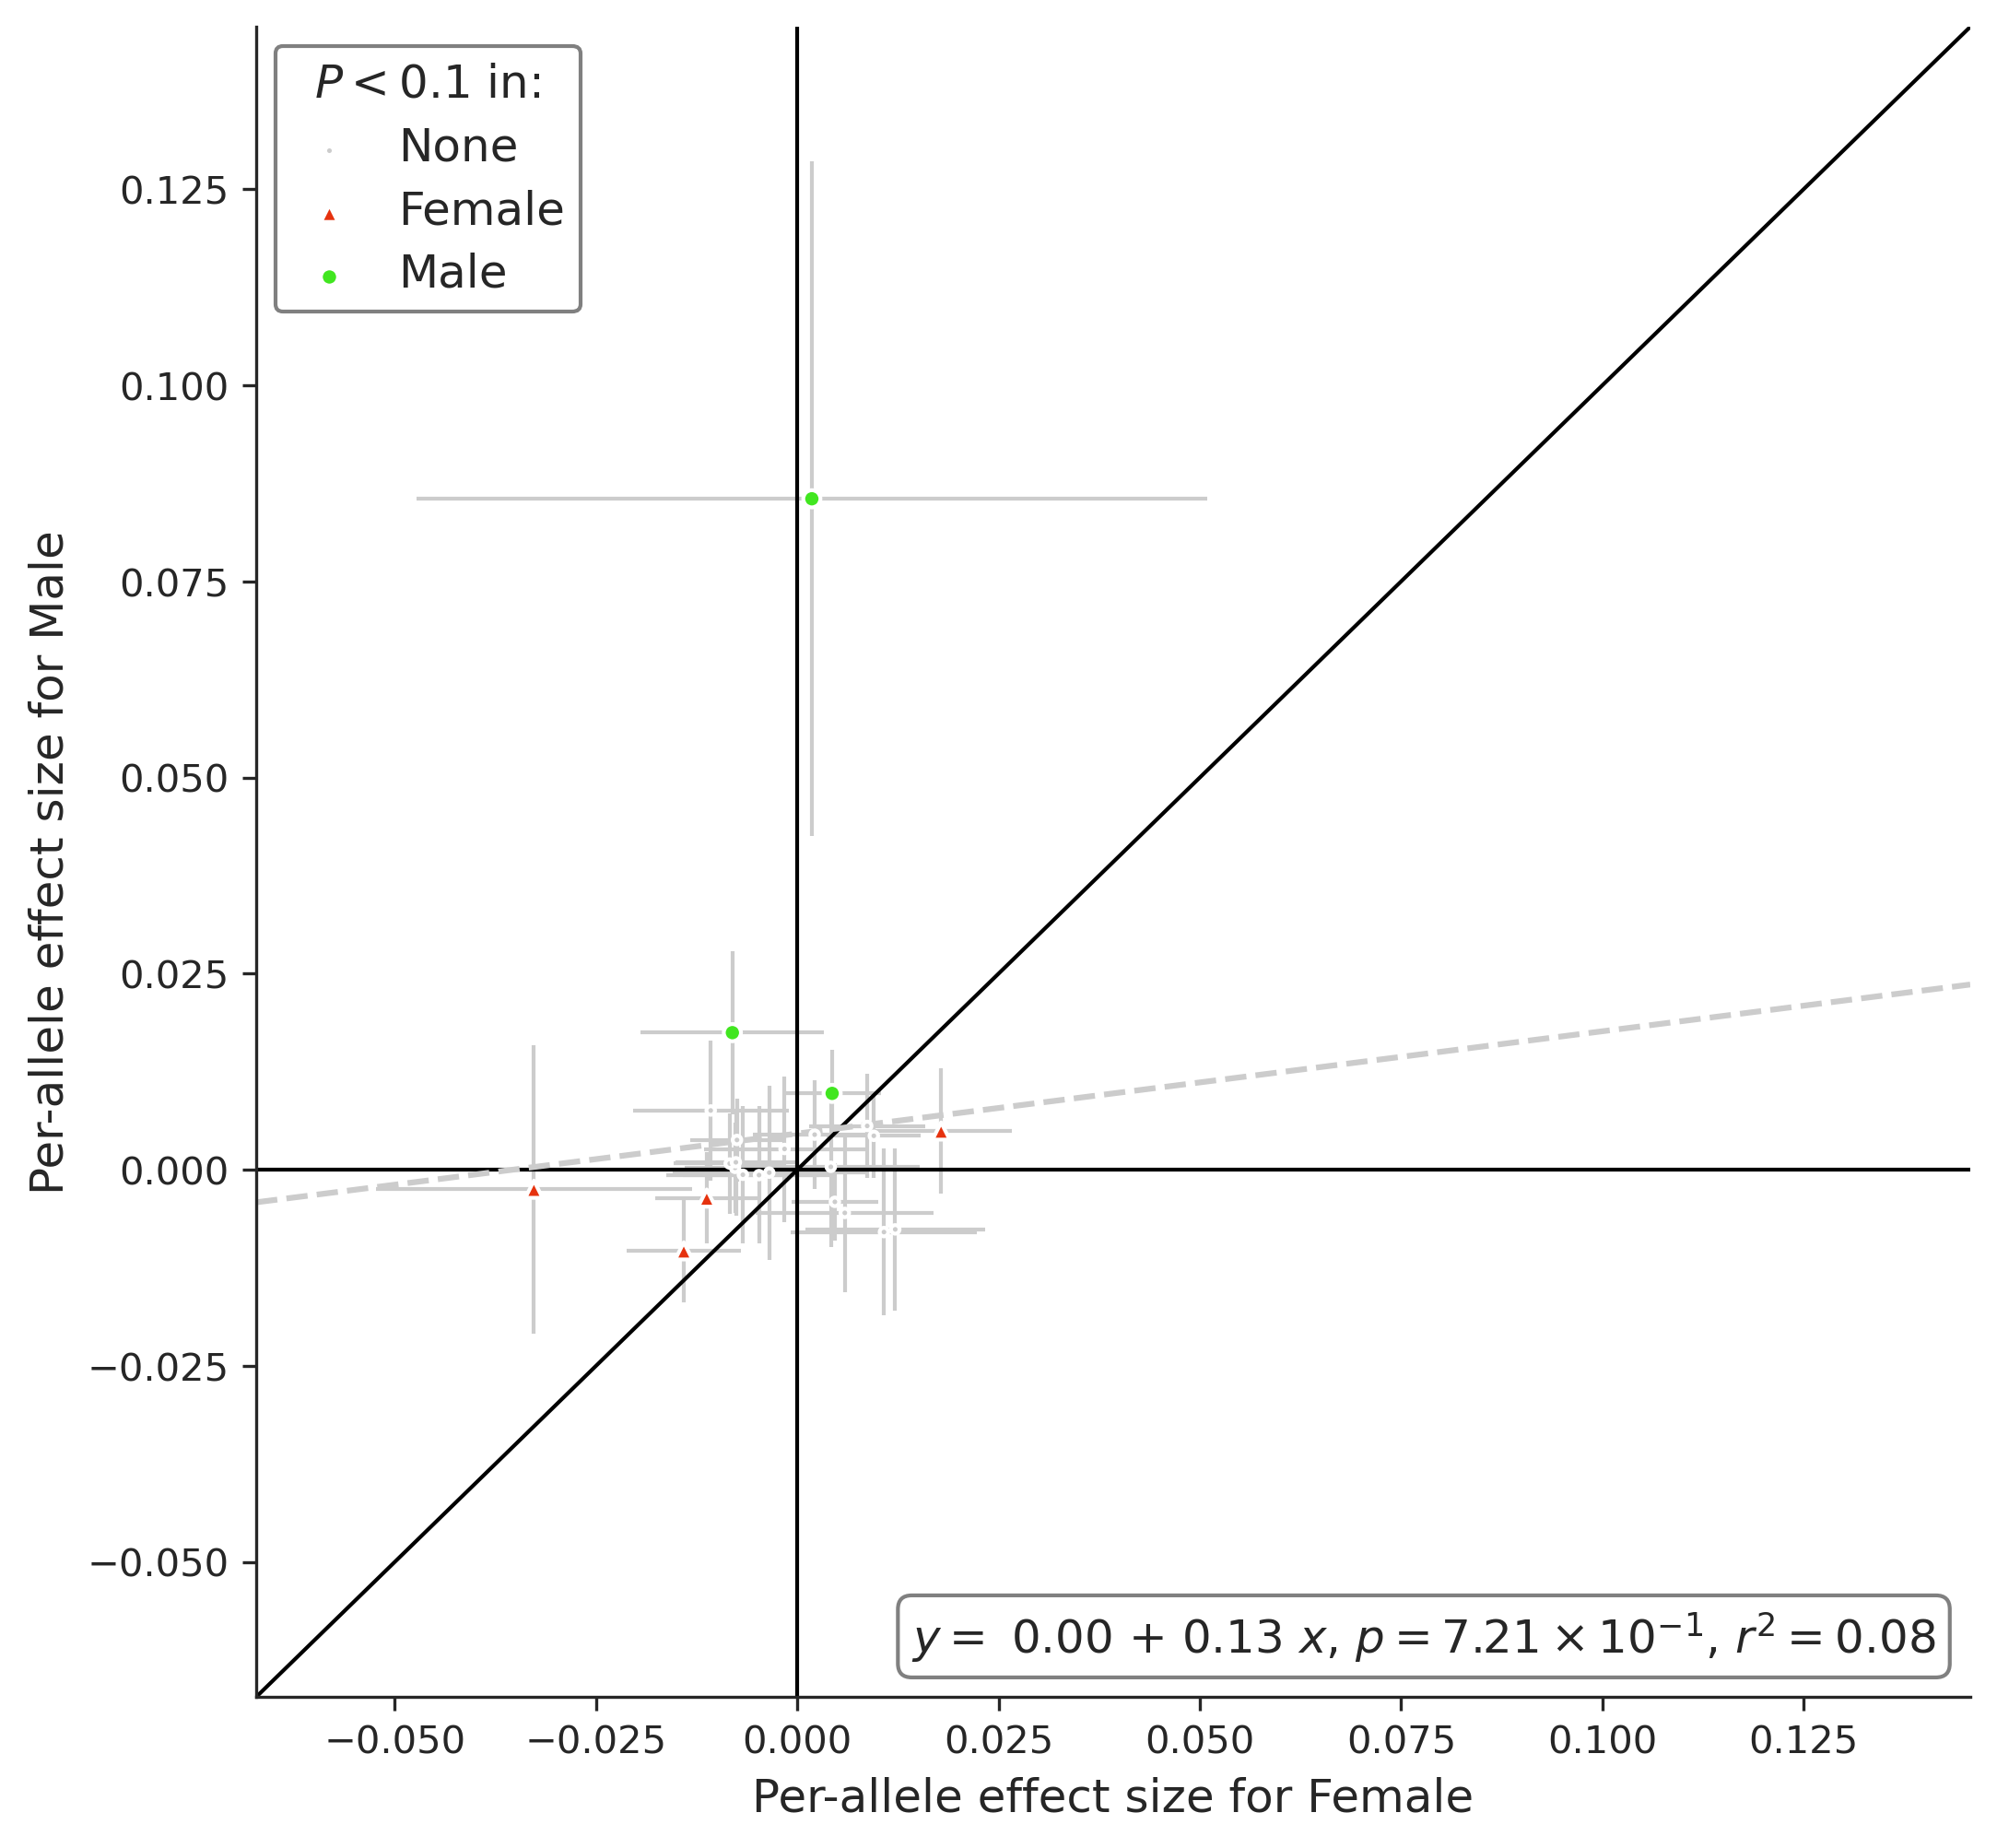

In [15]:
#figure
a[1]

In [16]:
#log
a[2]

# annotate

Sun Feb  5 21:46:41 2023 Start to process the raw sumstats for plotting...
Sun Feb  5 21:46:41 2023  -Loading Male SNP list in memory...
Sun Feb  5 21:46:47 2023  -Loading sumstats for Female: SNP,P,CHR,POS
Sun Feb  5 21:46:55 2023  -Counting  variants available for both datasets: 5961600  variants...
Sun Feb  5 21:47:00 2023  -Using only variants available for both datasets...
Sun Feb  5 21:47:00 2023  -Extract lead variants from Female...
Sun Feb  5 21:47:00 2023 Start to extract lead variants...
Sun Feb  5 21:47:00 2023  -Processing 5961600 variants...
Sun Feb  5 21:47:00 2023  -Significance threshold : 5e-08
Sun Feb  5 21:47:00 2023  -Sliding window size: 500  kb
Sun Feb  5 21:47:01 2023  -Found 948 significant variants in total...
Sun Feb  5 21:47:01 2023  -Identified 20 lead variants!
Sun Feb  5 21:47:01 2023 Finished extracting lead variants successfully!
Sun Feb  5 21:47:02 2023  -Loading sumstats for Male: SNP,P,CHR,POS
Sun Feb  5 21:47:13 2023  -Extract lead snps from Male...

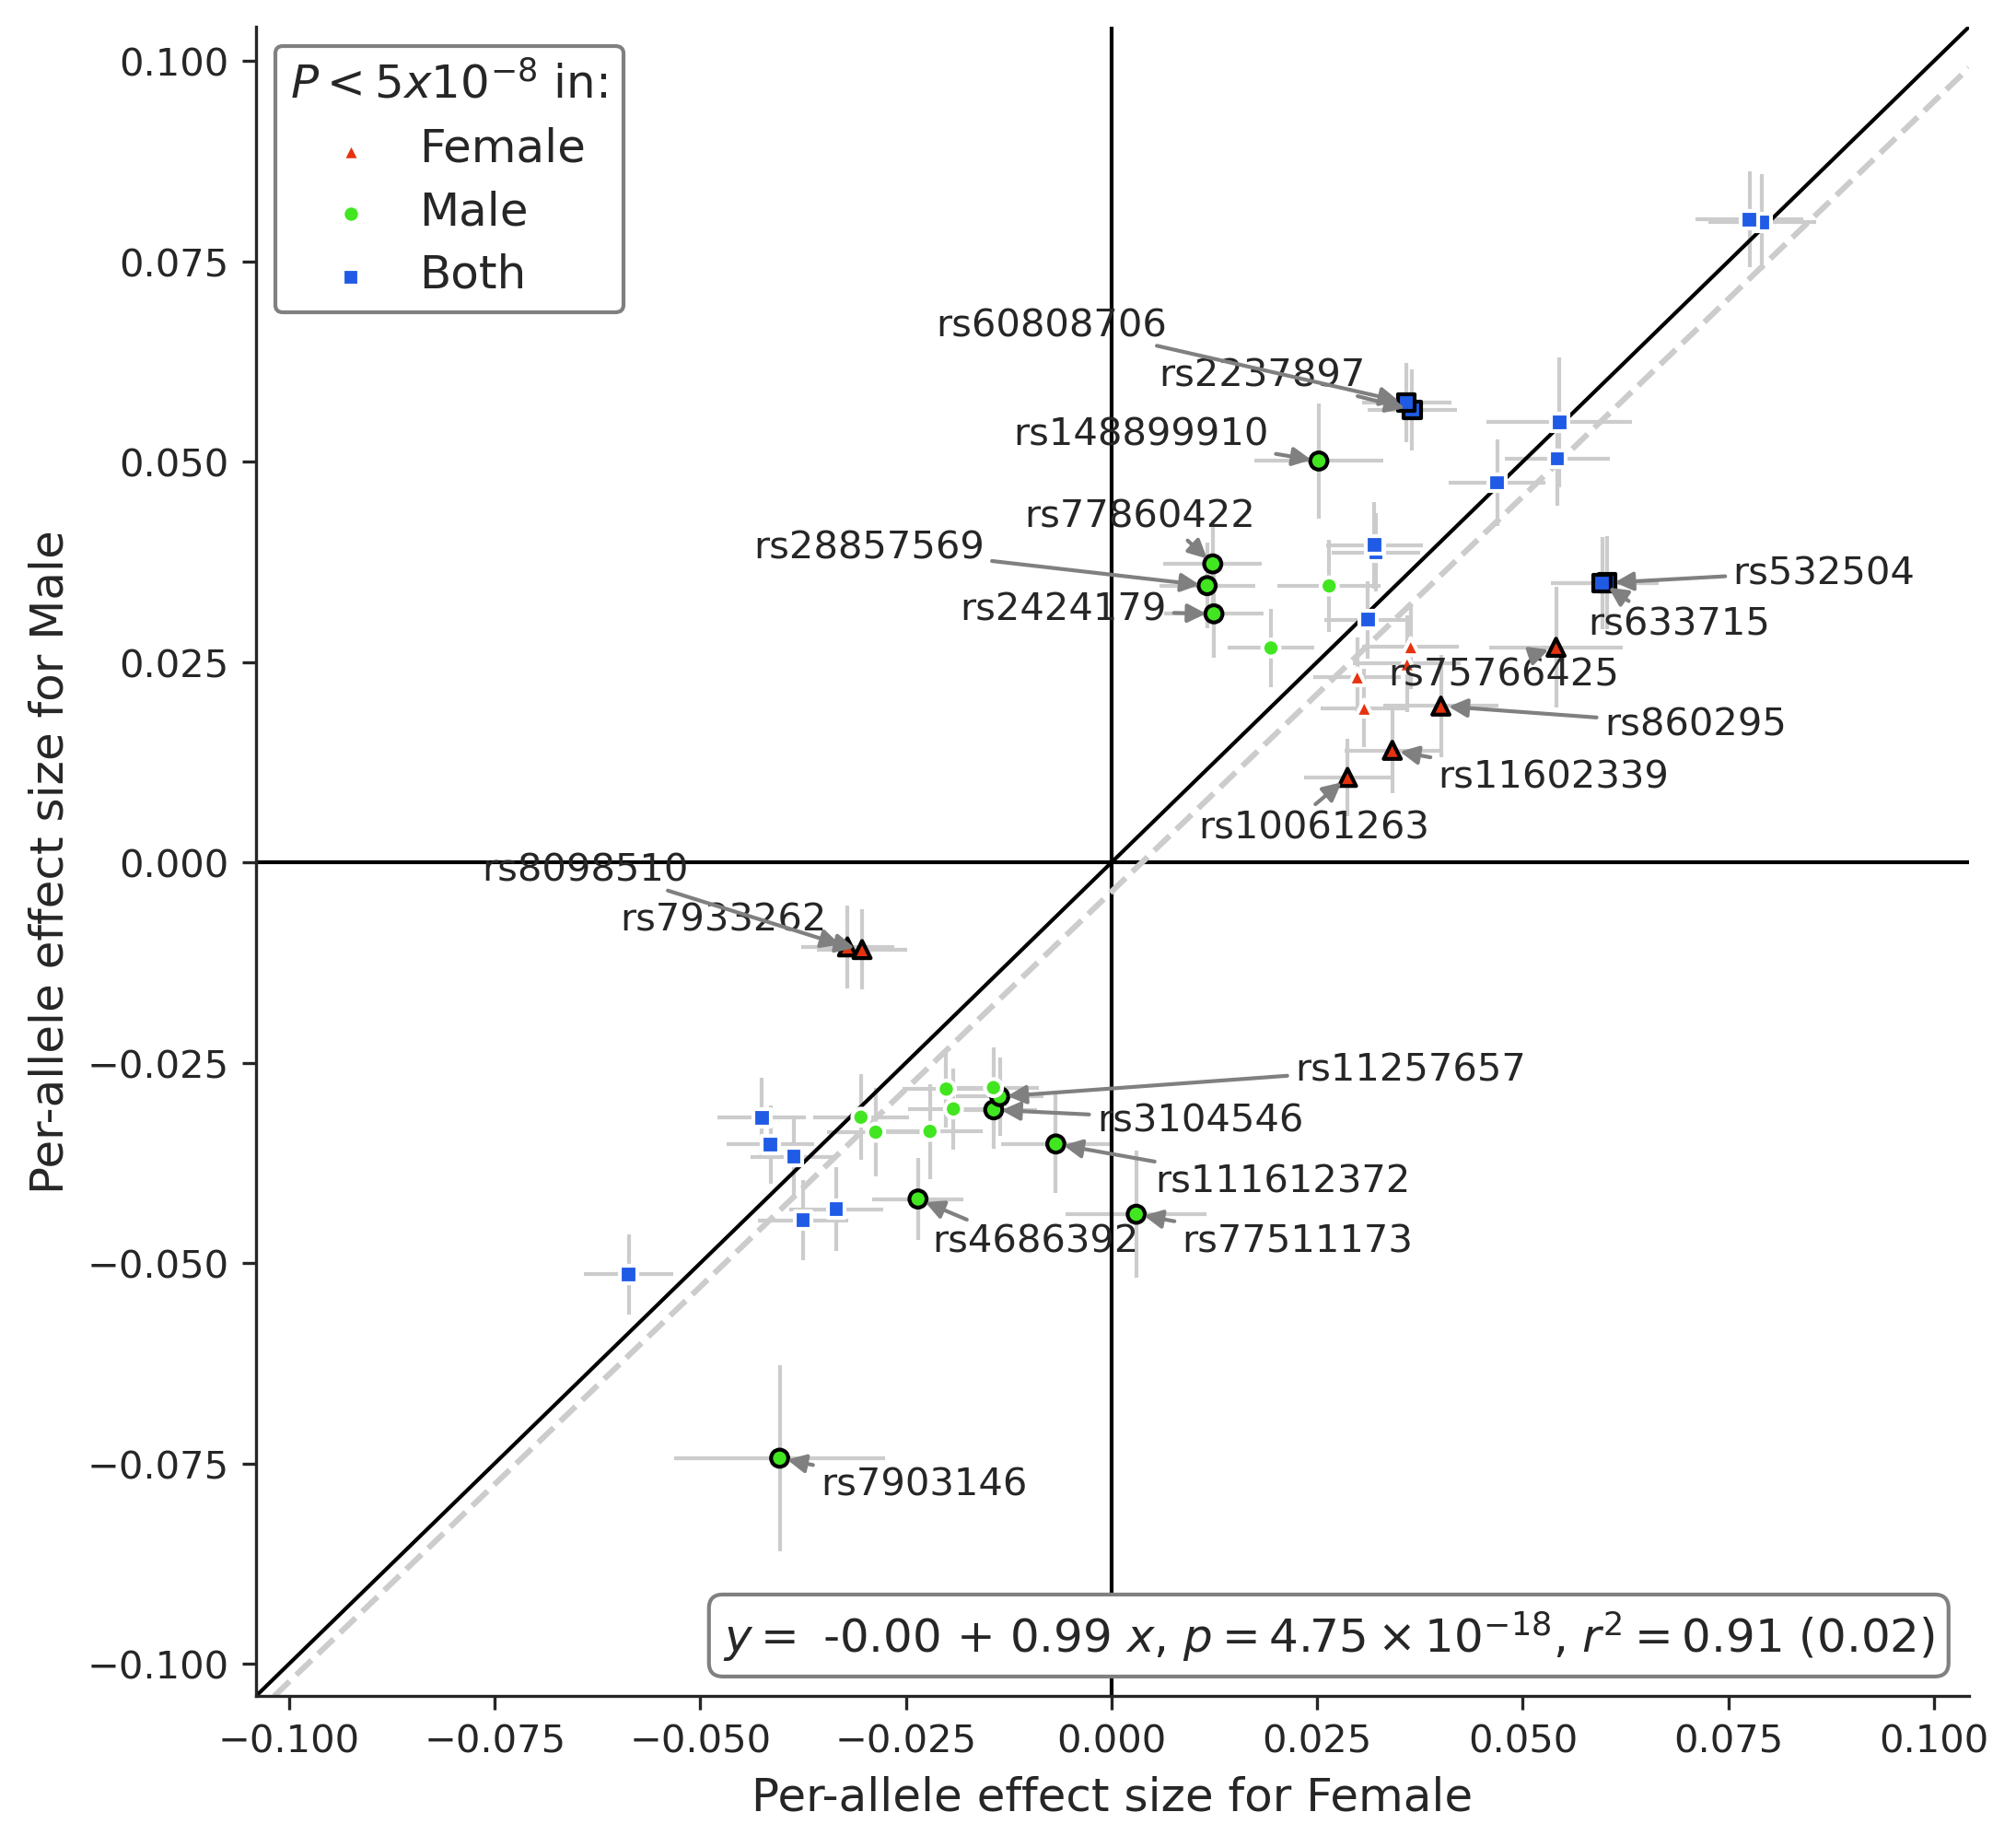

In [4]:
# r2_se=True : estimate the se for R2 using jackknife method
a = gl.compare_effect("bbj_bmi_female.txt.gz",
                      ["SNP","P","REF","ALT","CHR","POS"],["BETA","SE"],
                      "bbj_bmi_male.txt.gz",
                      ["SNP","P","REF","ALT","CHR","POS"],["BETA","SE"],
                      label=["Female","Male","Both","None"],
                      xylabel_prefix="Per-allele effect size for ",
                      r2_se=True,
                      anno=True,
                      anno_het=True,
                      anno_diff=0.015,
                      sig_level=5e-8,
                      legend_title=r'$ P < 5 x 10^{-8}$ in:',
                      verbose=True
)